In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Load the data 
data = pd.read_csv('mushroom.csv')

In [3]:
# Exploratory Data Analysis (EDA)
print(data.describe())  # Get summary statistics
print(data.info())  # Check data types and missing values


        Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000      2.000000      1.000000
25%     290.000000      5.291009      5.723521
50%     607.000000      8.318596     12.124902
75%     957.250000     11.781272     18.698605
max    1279.000000     15.095066     25.000054
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment          

<Figure size 1200x800 with 0 Axes>

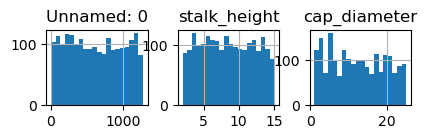

In [4]:
# Visualize feature distributions
plt.figure(figsize=(12, 8))
data.hist(bins=20, layout=(4, 4))
plt.show()

In [54]:
# Identify the target variable 
target_column = 'class'  # mentioning name as it is not last column in dataset.
# Split data into features and target
X = data.drop(target_column, axis=1)
y = data[target_column]

In [55]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder, StandardScaler
categorical_cols = X.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])


In [56]:
# Standardize numerical features
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])


In [57]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [58]:
# SVM   Classifier
svm = SVC()

# Train the SVM model

In [59]:
svm.fit(X_train, y_train)

SVC()

In [66]:
# Hyperparameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10]
}


In [68]:
# Grid Search
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']})

In [69]:
# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'kernel': 'poly'}


In [71]:
# Train   SVM with best parameters
best_svm = SVC(**best_params)
best_svm.fit(X_train, y_train)

SVC(C=10, kernel='poly')

In [72]:
# Predictions with best model
y_pred = best_svm.predict(X_test)


In [74]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8575
Precision: 0.8776978417266187
Recall: 0.9138576779026217
F1-score: 0.8954128440366973


In [76]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 99  34]
 [ 23 244]]


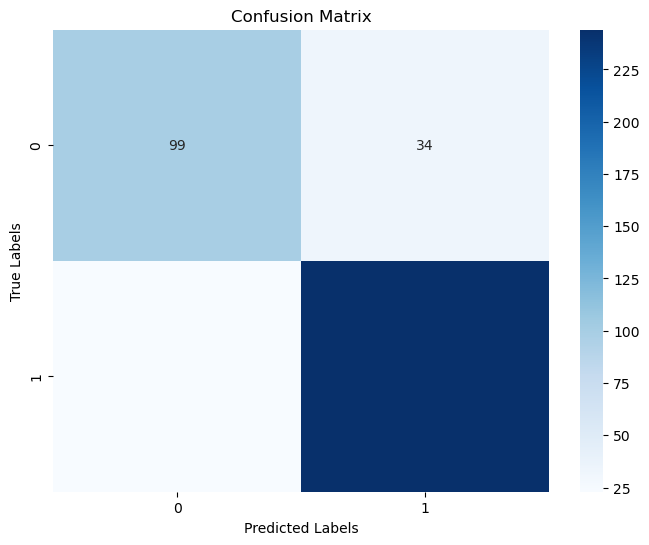

In [77]:
# Visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [79]:
kernels = ['linear', 'poly', 'rbf']
accuracies = []

for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print("Accuracies for different kernels:", accuracies)

Accuracies for different kernels: [0.6675, 0.82, 0.775]


In [ ]:
'''Real-world Applications: 
SVM is widely used in various domains like image classification, text classification, and bioinformatics.
Advantages: SVM's ability to handle nonlinear relationships and high-dimensional data makes it suitable for complex classification problems.
Considerations: The choice of kernel and hyperparameter tuning are crucial for SVM performance. Computational complexity might be a
limitation for large datasets.'''